# PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem.

# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/Bank_Customer_retirement.csv')

In [3]:
dataset.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   500 non-null    int64  
 1   Age           500 non-null    float64
 2   401K Savings  500 non-null    float64
 3   Retire        500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [5]:
dataset.head(10)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
5,5,50.499789,742398.9068,1
6,6,39.573302,578650.3156,0
7,7,55.159309,533821.2011,1
8,8,30.791271,459592.4084,0
9,9,40.456073,396800.2509,0


In [6]:
dataset.isnull().sum()

Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64

In [7]:
dataset.drop(['Customer ID'], axis = 1, inplace = True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           500 non-null    float64
 1   401K Savings  500 non-null    float64
 2   Retire        500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


# VISUALIZING THE DATA

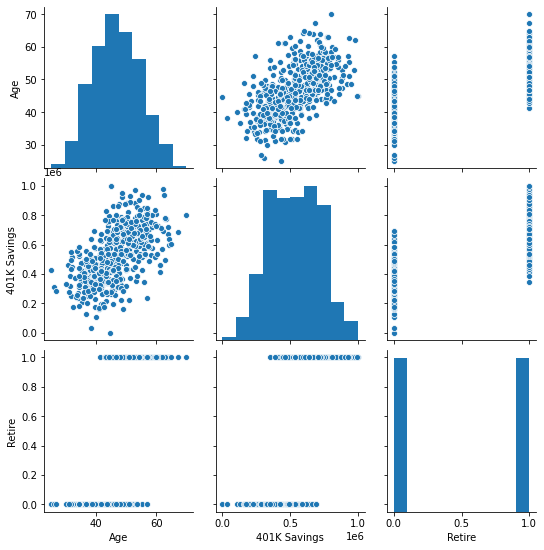

In [9]:
sns.pairplot(dataset)

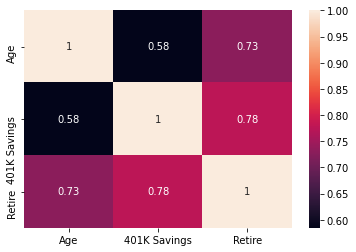

In [10]:
sns.heatmap(dataset.corr(), annot = True)

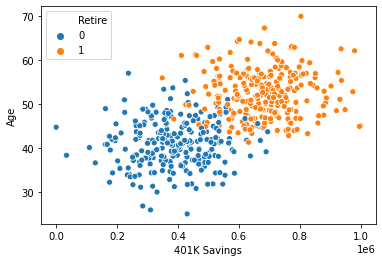

In [11]:
sns.scatterplot(x = '401K Savings', y = 'Age', hue = 'Retire', data = dataset)

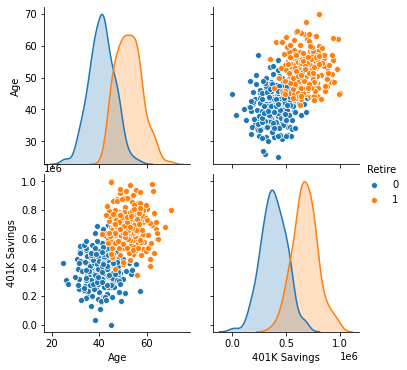

In [12]:
sns.pairplot(dataset, hue = 'Retire')

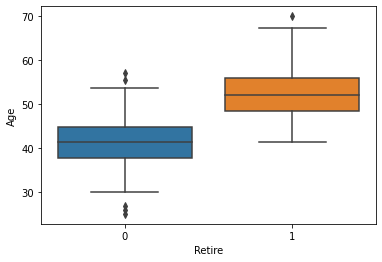

In [13]:
sns.boxplot(x = 'Retire', y = 'Age', data = dataset)

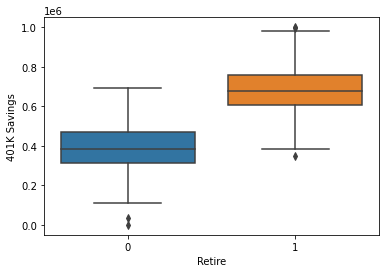

In [14]:
sns.boxplot(x = 'Retire', y = '401K Savings', data = dataset)

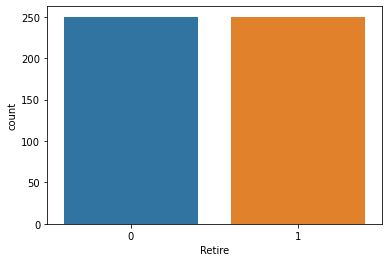

In [15]:
sns.countplot(dataset['Retire'])

# MODEL SCALING AND TRAINING

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
X = dataset.drop(['Retire'], axis = 1)
y = dataset['Retire']

print(X.shape, y.shape)

(500, 2) (500,)


In [18]:
print(X)

[[3.91804173e+01 3.22349874e+05]
 [5.61016860e+01 7.68671574e+05]
 [5.70230427e+01 8.21505472e+05]
 [4.37113581e+01 4.94187485e+05]
 [5.47288232e+01 6.91435772e+05]
 [5.04997891e+01 7.42398907e+05]
 [3.95733022e+01 5.78650316e+05]
 [5.51593087e+01 5.33821201e+05]
 [3.07912714e+01 4.59592408e+05]
 [4.04560728e+01 3.96800251e+05]
 [3.38911974e+01 2.72808272e+05]
 [4.27544162e+01 3.77042246e+05]
 [4.42249802e+01 4.82773224e+05]
 [4.74990645e+01 6.28103678e+05]
 [6.28624108e+01 7.71170284e+05]
 [5.63314358e+01 5.31736742e+05]
 [4.31669950e+01 4.75505760e+05]
 [6.37855439e+01 6.69249971e+05]
 [4.57904008e+01 4.88283996e+05]
 [4.90707308e+01 6.66179034e+05]
 [4.49290770e+01 6.67652074e+05]
 [4.83379384e+01 5.76300132e+05]
 [5.12910441e+01 5.84324079e+05]
 [4.70737861e+01 6.76035723e+05]
 [4.77597585e+01 5.38416345e+05]
 [4.96926983e+01 7.27503276e+05]
 [3.80404142e+01 3.82831370e+05]
 [4.80212941e+01 7.59955470e+05]
 [3.48599990e+01 3.49137707e+05]
 [4.04035374e+01 4.39074522e+05]
 [3.678089

In [19]:
print(y)

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64


In [20]:
scaler = StandardScaler()

In [21]:
X = scaler.fit_transform(X)

In [22]:
print(X)

[[-9.73572063e-01 -1.13412344e+00]
 [ 1.20074689e+00  1.24641069e+00]
 [ 1.31913773e+00  1.52820944e+00]
 [-3.91363327e-01 -2.17597767e-01]
 [ 1.02433922e+00  8.34460155e-01]
 [ 4.80924346e-01  1.10628086e+00]
 [-9.23087848e-01  2.32899377e-01]
 [ 1.07965497e+00 -6.20447388e-03]
 [-2.05154554e+00 -4.02116603e-01]
 [-8.09655157e-01 -7.37029456e-01]
 [-1.65321679e+00 -1.39836216e+00]
 [-5.14326734e-01 -8.42412200e-01]
 [-3.25364839e-01 -2.78477708e-01]
 [ 9.53426051e-02  4.96667454e-01]
 [ 2.06947442e+00  1.25973799e+00]
 [ 1.23026887e+00 -1.73222988e-02]
 [-4.61311925e-01 -3.17239982e-01]
 [ 2.18809354e+00  7.16128337e-01]
 [-1.24214218e-01 -2.49085047e-01]
 [ 2.97295776e-01  6.99748964e-01]
 [-2.34891064e-01  7.07605679e-01]
 [ 2.03134720e-01  2.20364266e-01]
 [ 5.82597624e-01  2.63161375e-01]
 [ 4.06959449e-02  7.52321324e-01]
 [ 1.28840798e-01  1.83045224e-02]
 [ 3.77216242e-01  1.02683244e+00]
 [-1.12005814e+00 -8.11534902e-01]
 [ 1.62447125e-01  1.19992184e+00]
 [-1.52872946e+00 -9

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


In [24]:
model = SVC()
model.fit(X_train, y_train)

SVC()

# EVALUATING THE MODEL

In [25]:
y_predict = model.predict(X_test)

print(y_predict.shape)
print(y_predict)

(100,)
[1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1]


[[46  1]
 [ 4 49]]
        Pred:0  Pred:1
True:0      46       1
True:1       4      49


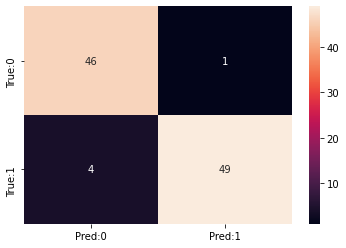

In [26]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.92      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# EVALUATING THE MODEL by Grid

In [28]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [29]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid = GridSearchCV(SVC(), param_grid, verbose = 4)

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.925, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [34]:
y_predict = grid.predict(X_test)

print(y_predict.shape)
print(y_predict)

(100,)
[1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1]


[[46  1]
 [ 4 49]]
        Pred:0  Pred:1
True:0      46       1
True:1       4      49


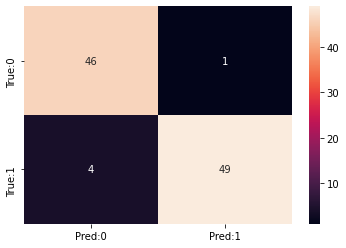

In [35]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True)

In [36]:
print(classification_report(y_test, y_predict)) # Same like without Grid

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.92      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

